In [7]:
import jax 
from jax import numpy as jnp
import jaxnn

In [8]:
x = jnp.linspace(-10, 10, 100)
x = x[:, None]
y = (3 * x) + (.02 * x ** 2) + (.003 * x ** 3) + (.009 * x ** 4) + 10.6
x = x + jax.random.normal(jax.random.PRNGKey(1024), x.shape)

In [9]:
from jaxnn import Model
from jaxnn import nn

model = Model([
    nn.dense(24),
    nn.relu(),
    nn.dense(128),
    nn.relu(),
    nn.dense(1)
])
state = model.fit(x=x, y=y, optimizer=jaxnn.optimizers.sgd(1e-5), loss_fn=jaxnn.loss.mse(), epoch=100)

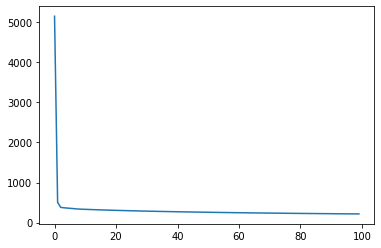

In [10]:
from matplotlib import pyplot as plt
plt.plot(model.losses)

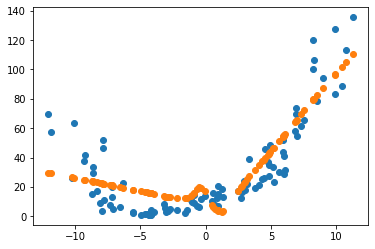

In [11]:
y_hat = model.predict(x)
# print(y_hat)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

In [13]:
model.losses[0], model.losses[-1]

(DeviceArray(5155.0337, dtype=float32), DeviceArray(215.19199, dtype=float32))